<a href="https://colab.research.google.com/github/brianvoha/Lyric-based-Classification-of-Musical-Genres/blob/master/FINALPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install langdetect

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=a4f6e3440e5fbc2fbf0eca86fbcf8543636e24eb8f51b7161f19ebae0e5ecd2a
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
!pip install whatthelang

     |████████████████████████████████| 788kB 2.8MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
     |████████████████████████████████| 245kB 43.0MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-cp36-none-any.whl size=789774 sha256=c6e1c895f29222d76ed2cc3f0a7123b42fb61f4d6de9671a9b9e260d038e183b
  Stored in directory: /root/.cache/pip/wheels/54/ec/de/379ea04fcc427c46fe3ecd21a5041875fcb41bbd81062abba5
  Created wheel for cysignals: filename=cysignals-1.10.2-cp36-cp36m-linux_x86_64.whl size=712495 sha256=de779fcc9d7de1892a62ecca4f87e1e74c11a940354ee9f53ad65c6eafbab9be
  Stored in directory: /root/.cache/pip/wheels/42/e3/e3/b4f55dcd70e68a76b7c2ac9dfab601d009da52a19903a885af
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp36-cp36m-linux_x86_64.whl size=1474237 sha256=a6a349fe75be2e43fbe3139b440c8c8eb59cbf03dfd2a38c1e3db01162eb6f50
  Stored in directory: /root/.cache/pip/wheels/25/de/c6/3d26a304c069689a7bf5ef2cc774588663700c8381dbf3d947
Successful

In [0]:
# DONT RUN
import pandas as pd
import matplotlib.pyplot as plt
from whatthelang import WhatTheLang

songList = pd.read_csv("lyrics.csv", engine='python', error_bad_lines=False, encoding='utf-8')

# replace '\n' with space
songList = songList.replace({'\n': ' '}, regex=True)

# Clean up the dataset (from Lyrics Genre Analysis - Machine Learning)
songList['lyrics'] = songList['lyrics'].str.replace(r'[^\w\s]+', '')
songList['lyrics'] = songList['lyrics'].str.replace(r'^\s+$', '')
songList['lyrics'] = songList['lyrics'].str.replace(r'^[\s\d\s]+$', '')

# remove all songs with <13 characters (Includes all the Instrumental songs)
songList=songList[songList.lyrics.apply(lambda x: len(str(x))>=13)]
print(str(len(songList))+" rows left.")

# Remove duplicate lyrics fields, keep the first entry
songList.drop_duplicates(subset ="lyrics", keep = 'first', inplace = True)

print(str(len(songList))+" rows left.") 

# Remove songs with 'Not Available' or 'Other' as their genres
songList = songList[songList['genre']!='Not Available'].dropna()
songList = songList[songList['genre']!='Other'].dropna()
print(str(len(songList))+" rows left.")

# Remove songs that are not in english
wtl = WhatTheLang()
songList=songList[songList.lyrics.apply(lambda x: wtl.predict_lang(str(x))=="en")]
print(str(len(songList))+" rows left.")

songList['word_count'] = songList['lyrics'].str.split().str.len()
songList.head()

#remove all songs with <100 words or >1000 words
df_clean = songList[songList['word_count'] >= 100]
df_clean = songList[songList['word_count'] <= 1000]
df_clean['word_count'].groupby(df_clean['genre']).describe()
print(str(len(df_clean))+" rows left.")

df_clean.to_csv("clean.csv", encoding='utf-8')

261490 rows left.
243116 rows left.
217188 rows left.
201423 rows left.
200943 rows left.


In [0]:
#DONT RUN
import random
import pandas as pd

In [0]:
#UPLOAD CLEAN.CSV AND START HERE
import pandas as pd

songList = pd.read_csv("clean.csv", engine='python', error_bad_lines=False, encoding='utf-8')
index = []
columns = ['index','song','year','artist','genre','lyrics']
final = pd.DataFrame(index=index,columns=columns)
a = set(songList['genre'])

# remove 5 genres with the least amount of songs
a.remove('Electronic')
a.remove('Folk')
a.remove('Indie')
a.remove('Jazz')
a.remove('R&B')

# take a random sample of 13353 for each of the remaining genres and put them into 
for genre in a:
    temp = songList[songList['genre'] == genre].sample(n=13353,random_state = 1)
    final = pd.concat([final,temp])
print(len(final))
final.to_csv("balanced.csv", encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


66765


In [0]:
# DONT RUN
# remove stopwords from final
# import nltk
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# tokenized = final['lyrics'].apply(lambda x: x.split())
# tokenized = tokenized.apply(lambda x: [item for item in x if item not in stop_words])
# detokenized_doc = [] 
# for i in range(len(final)): 
#     t = ' '.join(tokenized[i]) 
#     detokenized_doc.append(t) 
# final['lyrics'] = detokenized_doc

KeyError: ignored

In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split

# split data into train/val and test sets
final, test = train_test_split(final, test_size=0.2, random_state=1)
print(final.shape)
print(test.shape)
final = final[~final.isna().any(axis=1)]
# split train/val ito train and val sets
final['train'] = np.random.choice(a=[True,False], size=len(final), p=[0.8,0.2])
final.groupby('train').size()
df_full = final.copy()

66765
(53412, 8)
(13353, 8)


In [0]:
#create the language model and classfier model data bunches
data_lm2 = TextLMDataBunch.from_df(path='.', 
                             train_df=final[final['train']], 
                             valid_df=final[~final['train']], 
                             text_cols = 'lyrics',
                            )
data2 = TextClasDataBunch.from_df(path='.', 
                             train_df=final[final['train']], 
                             valid_df=final[~final['train']], 
                             text_cols = 'lyrics',
                             label_cols = 'genre',
                             vocab = data_lm2.train_ds.vocab, bs=32
                            )

In [0]:
#save our data bunches so we don't have to create them every time
data_lm2.save('data_lm2_export.pkl')
data2.save('data2_export.pkl')

In [0]:
#load in the data bunches
data_lm2 = load_data('.', 'data_lm2_export.pkl')
data2 = load_data('.', 'data2_export.pkl', bs=16)

In [0]:
#start fine-tuning the pre-trained model to fit our dataset
learn2 = language_model_learner(data_lm2, AWD_LSTM, drop_mult=0.5)
learn2.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.626846,4.429490,0.247604,11:13


In [0]:
learn2.unfreeze()
learn2.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.132540,4.057145,0.294620,12:37


In [0]:
learn2.save_encoder('ft_enc')

In [0]:
learn2 = text_classifier_learner(data2, AWD_LSTM, drop_mult=0.5)
learn2.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (42792 items)
x: TextList
xxbos xxmaj innocence smiles in the playground xxmaj as a grey man touches her hair sweets for a pretty girl xxmaj but she s not such a silly girl xxmaj as she slaps the hand away xxmaj poison on my plate so hungry i ate xxmaj poison on my plate so hungry i feel the steel inside xxmaj our mouths open wide xxmaj we sharpen our teeth and flexing our jaws xxmaj we bite the hand that feed us xxmaj he grows to be big and strong xxmaj eats the vegetables joins their family xxmaj the ignorance he found xxmaj helps the medicine go down xxmaj helps the stale untruths taste nicer xxmaj poison on my plate so hungry i ate xxmaj poison on my plate so hungry xxmaj the lies disguise wears thin xxmaj the fasting begins xxmaj the scraping of chairs cutlery screams xxmaj when may we leave the table,xxbos i do nt need a whole lotta money i do nt need a big fine car i got everything that a girl could want i got more than i coul

In [0]:
data2.show_batch()

text,target
xxbos xxmaj we xxmaj xxunk xxmaj to xxmaj take xxmaj dis xxmaj thing xxmaj to xxmaj another xxmaj level xxmaj ya xxmaj herd xxmaj me xxmaj all xxmaj the xxmaj ladies xxmaj come xxmaj to xxmaj the xxmaj front xxmaj all xxmaj the xxmaj hatas xxmaj get xxmaj out xxmaj da xxmaj building xxmaj ya xxmaj hear xxmaj me xxmaj chorus xxmaj slim xxmaj laid xxmaj back xxmaj in xxmaj,Hip-Hop
xxbos xxmaj chorus i try and try to stay in love xxmaj but no matter what i do xxmaj it just ai nt enough xxmaj it ai nt enough xxmaj it ai nt enough xxmaj it ai nt enough xxmaj you say it ai nt enough xxmaj and everytime i think its love xxmaj it just ai nt good enough xxmaj and we breakin up xxmaj we breakin up xxmaj,Hip-Hop
xxbos xxmaj have you ever in your life experienced a day xxmaj where nothing at all seems to go your way xxmaj no matter how hard you try to get out of the rut xxmaj you just could not break the string of bad luck a day where xxmaj murphys law takes over your life xxmaj and you just ca nt seem to do a darn thing right xxmaj and,Hip-Hop
xxbos xxmaj excuse me girl i do nt mean to bud in xxmaj and i ai nt trynna make a scene and nuthin xxmaj but you got a face i done seen in magazines and somethin xxmaj kinda xxmaj legs that the models be seen them struttin some pretty brown eyes and i seen them cuttin xxmaj in my direction but i mean its nuthin xxmaj if you have another,Hip-Hop
xxbos intro buddha monk xxmaj allah is god we came here to travel xxmaj and speak the truth to those who do not know themselves xxmaj we do the knowledge to everythin in our existence xxmaj and expense forth the truth if you xxunk stand on your xxmaj own two feet what must be done nothin you shall die xxmaj in your own inequity i want y all to feel,Hip-Hop


In [0]:
learn2.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.075428,0.915585,0.642279,09:28


In [0]:
learn2.freeze_to(-2)
learn2.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.964418,0.872391,0.663277,10:49


In [0]:
learn2.unfreeze()
learn2.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.945841,0.840963,0.675235,17:34


In [0]:
interp2 = ClassificationInterpretation.from_learner(learn2)

In [0]:
interp2.most_confused(slice_size=10)

[('Pop', 'Rock', 446),
 ('Rock', 'Pop', 398),
 ('Rock', 'Country', 382),
 ('Metal', 'Rock', 314),
 ('Pop', 'Country', 303),
 ('Rock', 'Metal', 272),
 ('Country', 'Rock', 248),
 ('Hip-Hop', 'Pop', 184),
 ('Pop', 'Hip-Hop', 175),
 ('Country', 'Pop', 166),
 ('Metal', 'Pop', 108),
 ('Pop', 'Metal', 87),
 ('Hip-Hop', 'Rock', 73),
 ('Metal', 'Hip-Hop', 70),
 ('Rock', 'Hip-Hop', 59),
 ('Metal', 'Country', 40),
 ('Hip-Hop', 'Country', 36),
 ('Country', 'Metal', 33),
 ('Hip-Hop', 'Metal', 31),
 ('Country', 'Hip-Hop', 24)]

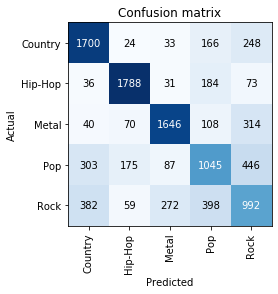

In [0]:
interp2.plot_confusion_matrix()

In [0]:
lyric = "MidnightYou come and pick me up, no headlights Long driv Could end in burning flames or paradise Fade into view, oh It's been a while since I have even heard from you And I should just tell you to leave, 'cause I Know exactly where it leads, but I Watch us go 'round and 'round each time You got that James Dean daydream look in your eye And I got that red lip classic thing that you like And when we go crashing down, we come back every time 'Cause we never go out of style, we never go out of style You got that long hair, slicked back, white t-shirt And I got that good girl faith and a tight little skirt And when we go crashing down, we come back every time 'Cause we never go out of style, we never go out of style"
print(str(learn2.predict(lyric)[0]))

Hip-Hop


In [0]:
for index, row in test.iterrows():
  test.at[index,'predicted'] = str(learn2.predict(row.lyrics)[0])

In [0]:
seriesObj = test.apply(lambda x: True if x['predicted'] == x['genre'] else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)

print("There are "+str(numOfRows)+" correctly identified songs.")
print("Accuracy: "+str(numOfRows/float(len(test))))

There are 9073 correctly identified songs.
Accuracy: 0.6794727776529619


In [0]:
pip install palettable

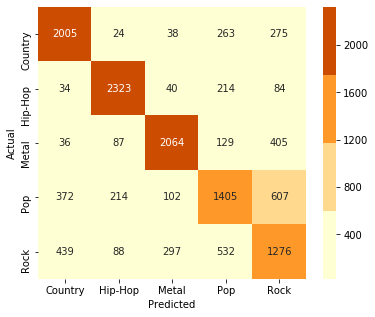

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from palettable.colorbrewer.sequential import YlOrBr_4
from matplotlib.colors import ListedColormap
import palettable

# test = pd.read_csv("predictFINAL.csv", engine='python', error_bad_lines=False, encoding='utf-8')
arr_actual = test['genre'].astype(str).values.tolist()
arr_predicted = test['predicted'].astype(str).values.tolist()

# confusion_matrix(arr_actual, arr_predicted)
y_actu = pd.Series(arr_actual, name='Actual')
y_pred = pd.Series(arr_predicted, name='Predicted')
df_confusion = pd.crosstab(test['genre'], test['predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6,5))
cmap = ListedColormap(palettable.colorbrewer.sequential.YlOrBr_4.mpl_colors)
sn.heatmap(df_confusion, annot=True, fmt='g', cmap=cmap,)

In [0]:
test.to_csv("predict.csv", encoding='utf-8')

In [0]:
## Tim's code for Naive Bayes, Logistic Regression, KNN, SVC
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import seaborn as sn

lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))

lyrics = []
genre = []
songList = pd.read_csv("balanced.csv", engine='python', error_bad_lines=False, encoding='utf-8')
for row in songList.itertuples():
    tlyrics = " ".join([lemmatizer.lemmatize(x.lower()) for x in row.lyrics.split() if x not in stop])

    lyrics.append(tlyrics)
    genre.append(row.genre)

tfidf_vectorizer = TfidfVectorizer( max_features=10000)
x = tfidf_vectorizer.fit_transform(lyrics)

xtrain, xval, ytrain, yval = train_test_split(x, genre, test_size=0.2, random_state=9)
#y = multilabel_binarizer.inverse_transform(songList['genre'])
#print(x.shape)
#print(y)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(xtrain,ytrain)
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
pred = lg.predict(xval)
svm = LinearSVC()
svm.fit(xtrain,ytrain)

a = list(set(genre))
print(a)
print(confusion_matrix(yval,pred,labels= a))
df_confusion = pd.crosstab(yval, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6,5))
sn.heatmap(df_confusion, annot=True, fmt='g', cmap='Blues')
print("nb:",nb.score(xval,yval))
print("knn:",knn.score(xval,yval))
print("lg:",lg.score(xval,yval))
print("svm:",svm.score(xval,yval))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['Pop', 'Hip-Hop', 'Country', 'Rock', 'Metal']
[[1355  185  375  583  190]
 [ 217 2180   54  110   80]
 [ 347   24 1935  278   64]
 [ 594   68  508 1072  460]
 [ 163   61   67  273 2110]]


AssertionError: ignored

In [0]:
import pandas as pd

songList = pd.read_csv("clean.csv", engine='python', error_bad_lines=False, encoding='utf-8')

for genre in set(songList['genre']):
    print(genre,len(songList[songList['genre']==genre]))